<a href="https://colab.research.google.com/github/MajedeR/mechanical-stress-prediction/blob/main/Stress_Strain_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#mount google drive to use dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
#import libraries
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
#Data folder direction
Data_dir = '/content/drive/MyDrive/stress_prediction_6061/Newunzipped_folder'

In [7]:
#make list for directions
file_names = os.listdir(Data_dir)
csv_paths = [os.path.join(Data_dir,i) for i in file_names]

print(f"Example Name:  {file_names[0]}")
print(f"Example Path:  {csv_paths[0]}")
print(f"Len Data: {len(csv_paths)}")

Example Name:  P_020_G_2_022_195_24.csv
Example Path:  /content/drive/MyDrive/stress_prediction_6061/Newunzipped_folder/P_020_G_2_022_195_24.csv
Len Data: 154


In [8]:
#Read csv files
data = [pd.read_csv(i) for i in csv_paths]

In [9]:
#Show the example data
example = data[0]
print(example)

        Strain  Stress_MPa
0    -0.000096    0.583252
1    -0.000099    0.591747
2    -0.000103    0.599371
3    -0.000105    0.606555
4    -0.000108    0.613481
...        ...         ...
1000  0.265238  230.688502
1001  0.265863  230.227235
1002  0.266486  229.756038
1003  0.267110  229.273017
1004  0.267111    0.000000

[1005 rows x 2 columns]


#Create DataSet

In [14]:
dataset = []
for i in range(0, len(csv_paths)):


  datadf = data[i]


  #Get features from file names
  datadata = file_names[i].split("_")
  datatype = datadata[0]
  dataTemp = datadata[1]
  dataLot = datadata[2]
  dataNum = datadata[3]



  #Get mechanical properties from df
  datastrains = datadf.iloc[ : , 0]
  datastress = datadf.iloc[ : , 1]



  #create dictionary for each sample
  for j in range(0, len(datastrains)):
    stress = datastress[j]
    strain = datastrains[j]

    datadict = {'sample_type': datatype,
          'temperature': dataTemp,
          'lot': dataLot,
          'stress': stress,
          'strain': strain
      }

    #Add sample to a list
    dataset.append(datadict)

In [17]:
#Creat dataframe for dataset
df = pd.DataFrame(dataset)
df = df.sort_values(by=['temperature'])
df

,sample_type,temperature,lot,stress,strain
0,P,020,G,0.583252,-0.000096
63830,T,020,E,272.601939,0.064304
63829,T,020,E,272.608750,0.064127
63828,T,020,E,272.610205,0.063950
63827,T,020,E,272.565233,0.063772
...,...,...,...,...,...
35261,P,300,F,37.729942,0.347223
35262,P,300,F,37.445593,0.348161
35263,P,300,F,37.161618,0.349099
35253,P,300,F,39.980465,0.339793


In [18]:
#Check missing data
print(df.isnull().sum())

sample_type    0
temperature    0
lot            0
stress         4
strain         0
dtype: int64


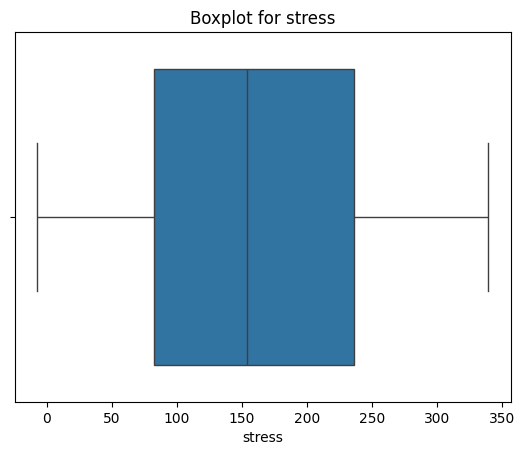

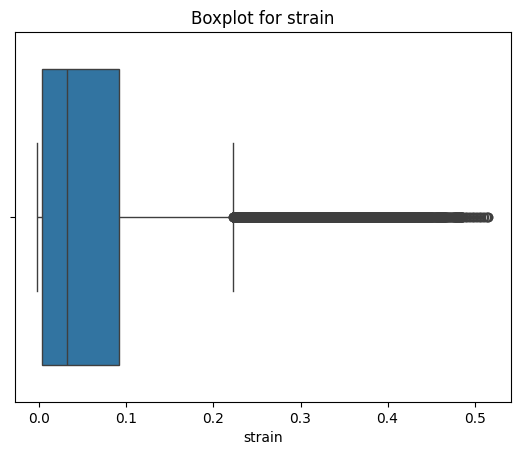

In [22]:
#Check outliers with histogram
features = ['stress', 'strain']

for feature in features:
    plt.figure()
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

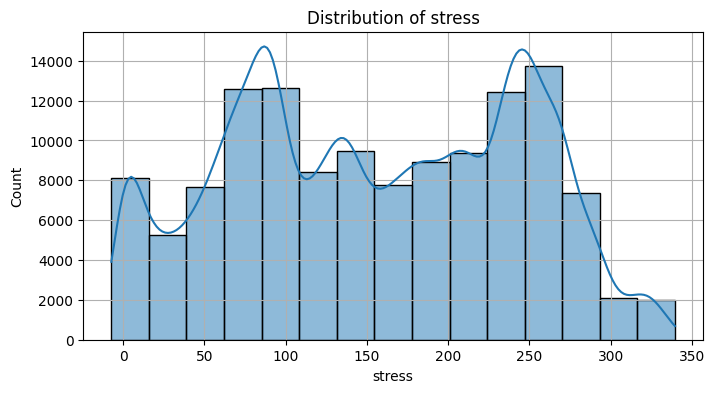

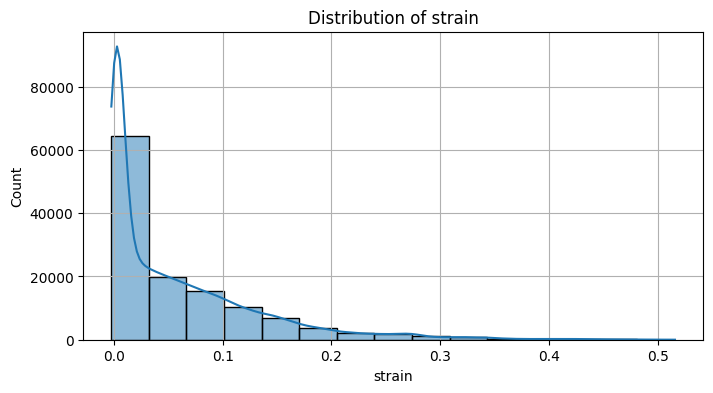

In [24]:
#show distribution of stress, strain
for i in features:
  plt.figure(figsize=(8,4))
  sns.histplot(df[i], bins=15, kde=True)
  plt.title(f'Distribution of {i}')
  plt.xlabel(f'{i}')
  plt.grid(True)

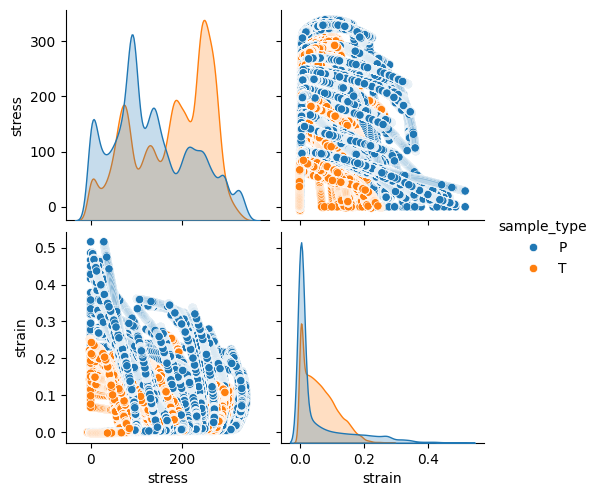

In [25]:
#Pair plot
sns.pairplot(df, hue='sample_type', diag_kind='kde')
plt.show()

In [26]:
#Convert text featutres to numeric features
##One-hot encoding for 'lot' and 'sample_type' column
df_encoded = pd.get_dummies(df, columns=['sample_type','lot'], drop_first=True)


# Convert True/False into 1/0
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

df_encoded.head()

,temperature,stress,strain,sample_type_T,lot_B,lot_C,lot_D,lot_E,lot_F,lot_G,lot_H,lot_I
0,020,0.583252,-0.000096,0,0,0,0,0,0,1,0,0
63830,020,272.601939,0.064304,1,0,0,0,1,0,0,0,0
63829,020,272.608750,0.064127,1,0,0,0,1,0,0,0,0
63828,020,272.610205,0.063950,1,0,0,0,1,0,0,0,0
63827,020,272.565233,0.063772,1,0,0,0,1,0,0,0,0


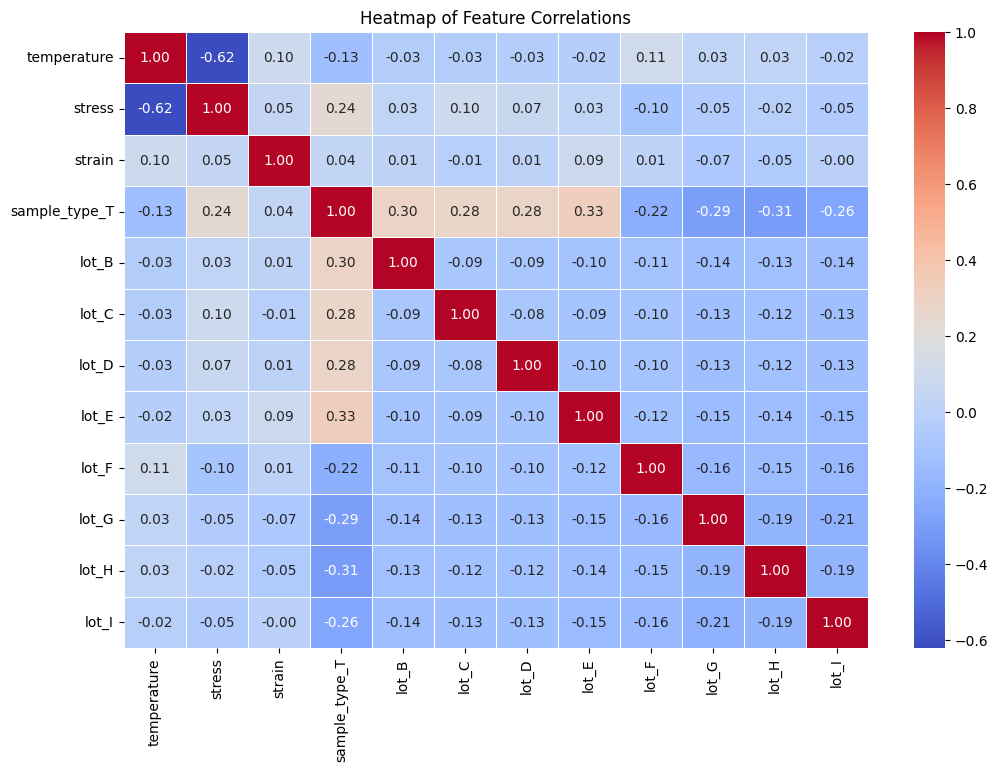

In [27]:
# Correlation matrix
corr_matrix = df_encoded.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

In [28]:
for i in features:
  correlation = df_encoded.corr(numeric_only=True)[i].sort_values(ascending=False)
  print(f"\n **Correlation with {i}** \n {correlation}")


 **Correlation with stress** 
 stress           1.000000
sample_type_T    0.236339
lot_C            0.100698
lot_D            0.069261
strain           0.048808
lot_E            0.030447
lot_B            0.026263
lot_H           -0.016608
lot_I           -0.047858
lot_G           -0.049062
lot_F           -0.098873
Name: stress, dtype: float64

 **Correlation with strain** 
 strain           1.000000
lot_E            0.086285
stress           0.048808
sample_type_T    0.041909
lot_B            0.013956
lot_D            0.012485
lot_F            0.011096
lot_I           -0.001241
lot_C           -0.014275
lot_H           -0.051515
lot_G           -0.067024
Name: strain, dtype: float64


# Data preprocessing for model

In [30]:
# select inputs(x) and outputs(y)
X = df_encoded[['temperature', 'sample_type_T']]
y = df_encoded[['stress', 'strain']]

# split data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

#Print split results
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (102219, 2)
X_test shape: (25555, 2)
y_train shape: (102219, 2)
y_test shape: (25555, 2)
